## **Universidad Peruana de Ciencias Aplicadas**
### CC235 - Procesamiento de Imágenes
### Docente: Peter Montalvo Garcia <pcccpmon@upc.edu.pe>
### Morfología matemática

---

### **Ejercicios de Morfología Matemática**

In [1]:
import numpy as np
import skimage.morphology as morph
from skimage.io import imread
from skimage.measure import label
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
%matplotlib inline

Vamos a leer una imagen

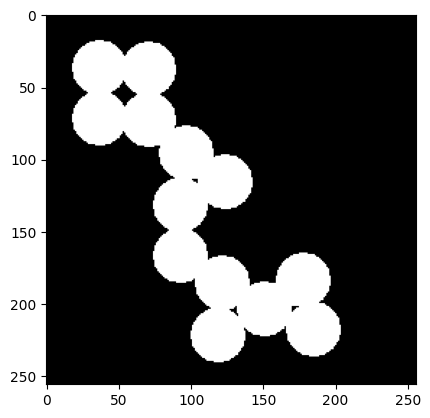

In [6]:
im = imread('https://www.mathworks.com/help/images/morph_close.png')[:,:256]/255
plt.imshow(im, cmap='gray')
plt.show()

Veamos el disco

In [10]:
disk_size_dilatacion = 4
morph.disk(disk_size_dilatacion)

array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

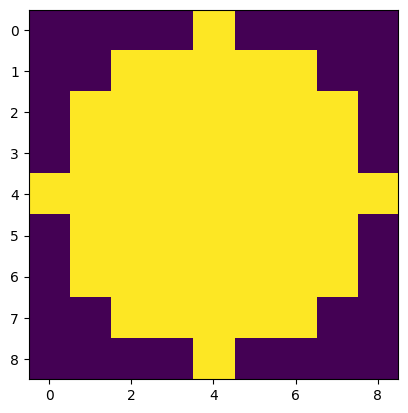

In [11]:
plt.imshow(morph.disk(disk_size_dilatacion))

## Dilatación

In [16]:
#@title Dilatación { run: "auto" }
disk_size = 18 #@param {type:"slider", min:1, max:20, step:1}

im_dilated = morph.binary_dilation(im, morph.disk(disk_size))
plt.imshow(im_dilated, cmap='gray')
plt.show()

IndexError: ignored

## Erosión

In [ ]:
#@title Erosión { run: "auto" }
disk_size = 15 #@param {type:"slider", min:1, max:20, step:1}

im_eroded= morph.binary_erosion(im, morph.disk(disk_size))
plt.imshow(im_eroded, cmap='gray')
plt.show()

In [ ]:
#@title Dilatación + Erosión { run: "auto" }
disk_size_dilatacion = 1 #@param {type:"slider", min:1, max:20, step:1}
disk_size_erosion = 6 #@param {type:"slider", min:1, max:20, step:1}

im_dilated = morph.binary_dilation(im, morph.disk(disk_size_dilatacion))
im_eroded_dilated = morph.binary_erosion(im_dilated, morph.disk(disk_size_erosion))

plt.figure(figsize=(10,10))
plt.imshow(im_eroded_dilated, cmap='gray')
plt.show()

In [ ]:
#@title Erosión + Dilatación { run: "auto" }
disk_size_erosion = 17 #@param {type:"slider", min:1, max:20, step:1}

disk_size_dilatacion = 3 #@param {type:"slider", min:1, max:20, step:1}

im_eroded = morph.binary_erosion(im, morph.disk(disk_size_erosion))
im_dilated_eroded = morph.binary_dilation(im_eroded, morph.disk(disk_size_dilatacion))

plt.figure(figsize=(10,10))
plt.imshow(im_dilated_eroded, cmap='gray')
plt.show()

## Veamos un caso conocido (conteo de granos de arroz)

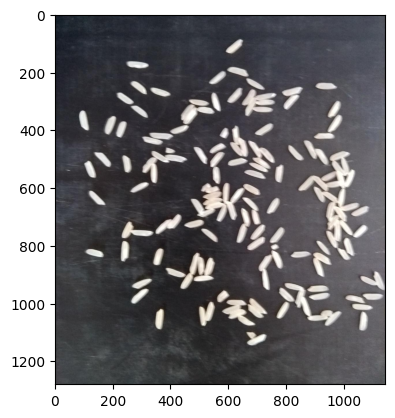

In [17]:
im1 = imread('https://drive.google.com/uc?id=1p9n9QQ3kl--XTFc2mFyQkCFIpAd5Vke5')
plt.imshow(im1)

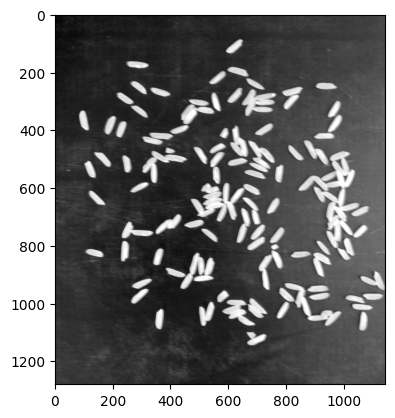

In [18]:
im_procesada = im1[:,:, 0]
plt.imshow(im_procesada,cmap='gray')

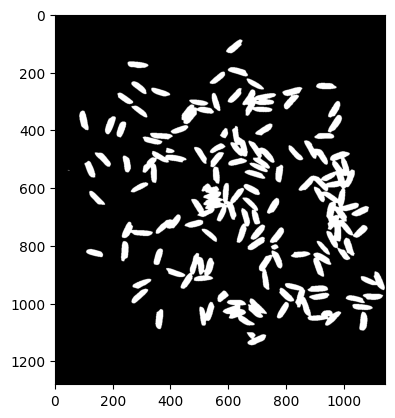

In [22]:
#@title Thresholding { run: "auto" }
th = 160 #@param {type:"slider", min:0, max:255, step:1}
im_th = (im_procesada > th)*1.0
plt.imshow(im_th,cmap='gray')

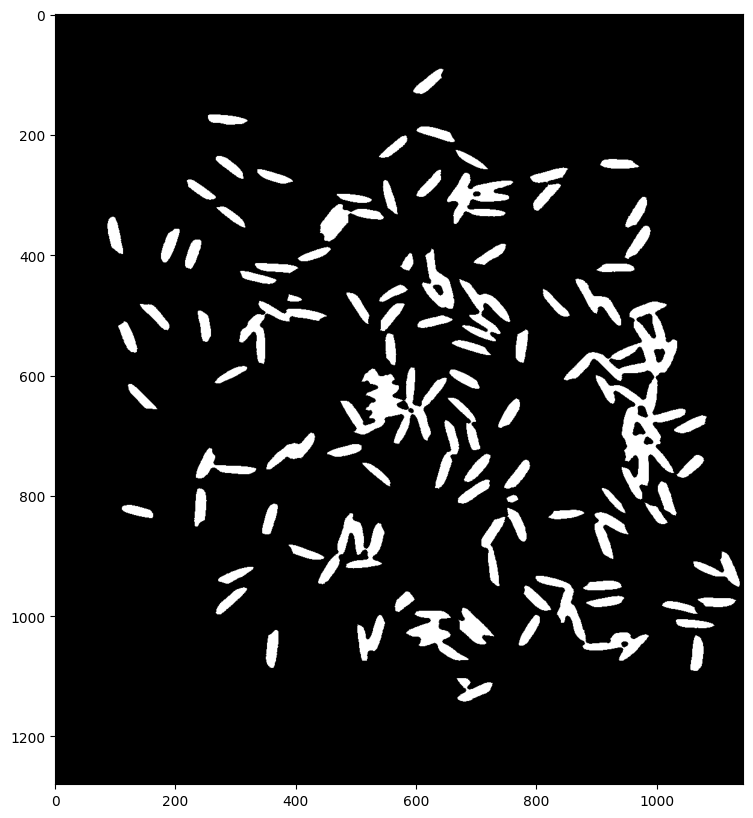

In [23]:
#@title Erosión { run: "auto" }
disk_size = 3 #@param {type:"slider", min:1, max:20, step:1}
im_eroded= morph.binary_erosion(im_th, morph.disk(disk_size))
plt.figure(figsize=(10,10))
plt.imshow(im_eroded, cmap='gray')
plt.show()

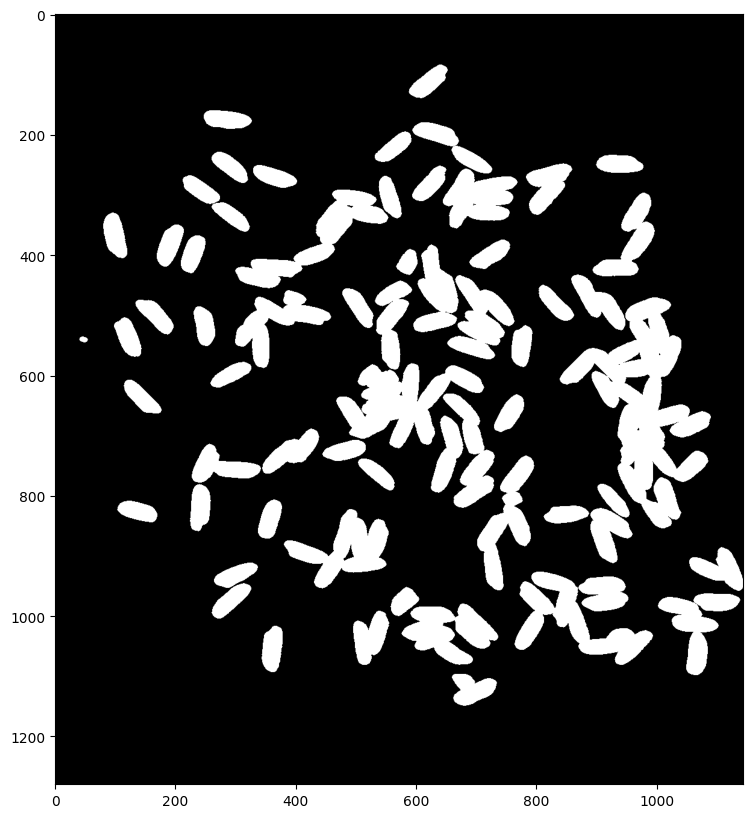

In [24]:
#@title Dilatación { run: "auto" }
disk_size = 4 #@param {type:"slider", min:1, max:20, step:1}

im_dilated = morph.binary_dilation(im_th, morph.disk(disk_size))
plt.figure(figsize=(10,10))
plt.imshow(im_dilated, cmap='gray')
plt.show()

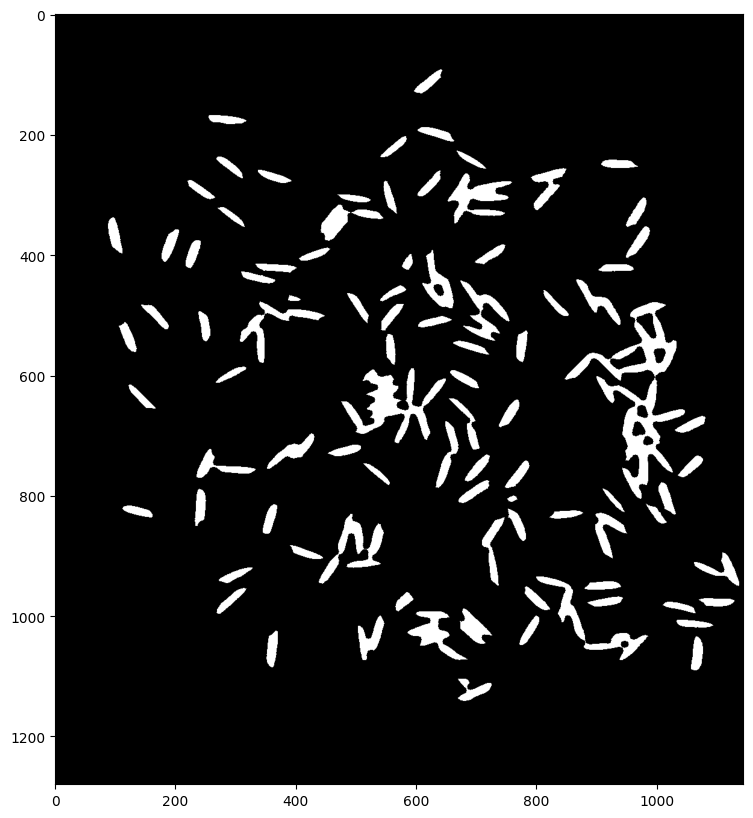

In [25]:
#@title Dilatación + Erosión { run: "auto" }
disk_size_dilatacion = 1 #@param {type:"slider", min:1, max:20, step:1}
disk_size_erosion = 5 #@param {type:"slider", min:1, max:20, step:1}

im_dilated = morph.binary_dilation(im_th, morph.disk(disk_size_dilatacion))
im_eroded_dilated = morph.binary_erosion(im_dilated, morph.disk(disk_size_erosion))

plt.figure(figsize=(10,10))
plt.imshow(im_eroded_dilated, cmap='gray')
plt.show()

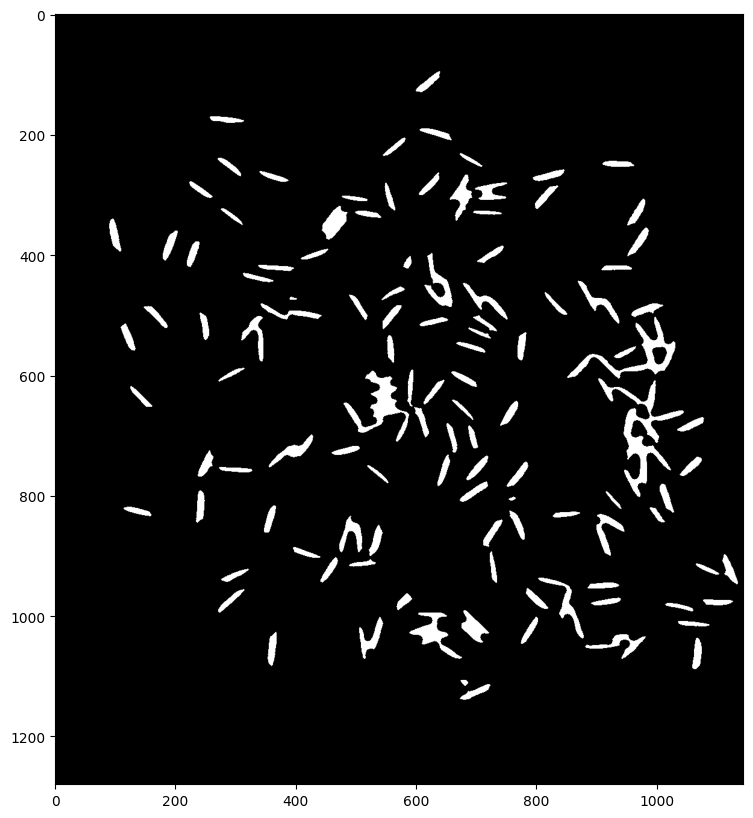

In [26]:
#@title Erosión + Dilatación { run: "auto" }
disk_size_erosion = 7 #@param {type:"slider", min:1, max:20, step:1}

disk_size_dilatacion = 1 #@param {type:"slider", min:1, max:20, step:1}

im_eroded = morph.binary_erosion(im_th, morph.disk(disk_size_erosion))
im_dilated_eroded = morph.binary_dilation(im_eroded, morph.disk(disk_size_dilatacion))

plt.figure(figsize=(10,10))
plt.imshow(im_dilated_eroded, cmap='gray')
plt.show()